In [ ]:
# Instalación de bibliotecas
!pip install tensorflow pandas matplotlib opencv-python scikit-learn

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d msambare/fer2013
!kaggle datasets download -d tapakah68/facial-emotion-recognitio
!kaggle datasets download -d sanidhyak/human-face-emotions
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions
!kaggle datasets download -d missaouimohamedamine/face-emotion-dataset
!kaggle datasets download -d tonny22/dataset-of-faces-as-per-emotions

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 86% 52.0M/60.3M [00:00<00:00, 123MB/s]
100% 60.3M/60.3M [00:00<00:00, 129MB/s]
403 - Forbidden - Permission 'datasets.get' was denied
Dataset URL: https://www.kaggle.com/datasets/sanidhyak/human-face-emotions
License(s): other
 86% 69.0M/80.5M [00:00<00:00, 150MB/s]
100% 80.5M/80.5M [00:00<00:00, 120MB/s]
Dataset URL: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions
License(s): unknown
 94% 113M/121M [00:01<00:00, 96.4MB/s] 
100% 121M/121M [00:01<00:00, 89.1MB/s]
Dataset URL: https://www.kaggle.com/datasets/missaouimohamedamine/face-emotion-dataset
License(s): apache-2.0
 94% 115M/123M [00:01<00:00, 113MB/s]  
100% 123M/123M [00:01<00:00, 99.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/tonny22/dataset-of-faces-as-per-emotions
License(s): unknown
 99% 457M/464M [00:08<00:00, 38.9MB/s]
100% 464M/464M [00:08<00:00, 58.0MB/s]


In [ ]:
import zipfile
import os

# Directorio donde están los archivos .zip descargados
download_dir = '/content/'  # Aquí ponemos el directorio donde están los archivos .zip

# Listamos todos los archivos en el directorio
zip_files = [f for f in os.listdir(download_dir) if f.endswith('.zip')]

# Descomprimir todos los archivos .zip
for zip_file in zip_files:
    zip_path = os.path.join(download_dir, zip_file)  # Ruta completa al archivo zip
    extract_dir = os.path.join(download_dir, zip_file.replace('.zip', ''))  # Crear carpeta de extracción
    os.makedirs(extract_dir, exist_ok=True)  # Crear la carpeta si no existe

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)  # Extraer todos los archivos
    print(f"Descomprimido: {zip_file} en {extract_dir}")


Descomprimido: face-emotion-dataset.zip en /content/face-emotion-dataset
Descomprimido: dataset-of-faces-as-per-emotions.zip en /content/dataset-of-faces-as-per-emotions
Descomprimido: human-face-emotions.zip en /content/human-face-emotions
Descomprimido: fer2013.zip en /content/fer2013
Descomprimido: facial-emotion-expressions.zip en /content/facial-emotion-expressions


In [ ]:
# Mapeo de las etiquetas a las nuevas categorías numeradas (0-8)
label_mapping = {
    'angry': 0,       # angry -> 0
    'contempt': 1,     # contempt -> 1
    'neutral': 2,      # neutral -> 2
    'disgust': 3,      # disgust -> 3
    'fear': 4,         # fear -> 4
    'happy': 5,        # happy -> 5
    'sad': 6,      # sad -> 6
    'surprise': 7,     # surprise -> 7
    'yawning': 8       # yawning -> 8
}

In [ ]:
import os
import pandas as pd

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels(dataset_path, label_mapping):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                image_paths.append(img_path)

                # Mapear la etiqueta usando el diccionario
                mapped_label = label_mapping.get(class_folder, None)  # Obtener la etiqueta de la carpeta
                if mapped_label is None:
                    print(f"Etiqueta no mapeada: {class_folder}")
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df

# Ruta de tu dataset
dataset_path = '/content/fer2013/test'  # Cambia esta ruta si es necesario
df_test_1 = load_images_and_labels(dataset_path, label_mapping)

# Ver las primeras filas para verificar que las etiquetas fueron aplicadas correctamente
df_test_1.head()


,image_path,label
0,/content/fer2013/test/surprise/PrivateTest_971...,7
1,/content/fer2013/test/surprise/PrivateTest_934...,7
2,/content/fer2013/test/surprise/PrivateTest_462...,7
3,/content/fer2013/test/surprise/PrivateTest_969...,7
4,/content/fer2013/test/surprise/PrivateTest_814...,7


In [ ]:
# Verificar la distribución de las etiquetas
print(df_test_1['label'].value_counts())


label
5    1774
6    1247
2    1233
4    1024
0     958
7     831
3     111
Name: count, dtype: int64


In [ ]:
#Repetimos para los otros datasets que son compatibles con esto.
#Para el dataset ckplus
dataset_path_2 = '/content/ckplus/CK+48'  # Ruta del segundo dataset
# Cargar y mapear etiquetas de este dataset
df_test_2 = load_images_and_labels(dataset_path_2, label_mapping)

# Verificar las primeras filas
print(df_test_2.head())

# Verificar la distribución de las etiquetas
print(df_test_2['label'].value_counts())

                                          image_path  label
0  /content/ckplus/CK+48/surprise/S061_001_000000...      7
1  /content/ckplus/CK+48/surprise/S078_001_000000...      7
2  /content/ckplus/CK+48/surprise/S042_001_000000...      7
3  /content/ckplus/CK+48/surprise/S050_002_000000...      7
4  /content/ckplus/CK+48/surprise/S115_001_000000...      7
label
7    249
5    207
3    177
0    135
6     84
4     75
1     54
Name: count, dtype: int64


In [ ]:
#Para el dataset human-face-emotions
dataset_path_3 = '/content/human-face-emotions/data'  # Ruta del segundo dataset
# Cargar y mapear etiquetas de este dataset
df_test_3 = load_images_and_labels(dataset_path_3, label_mapping)

# Verificar las primeras filas
print(df_test_3.head())

# Verificar la distribución de las etiquetas
print(df_test_3['label'].value_counts())

                                          image_path  label
0  /content/human-face-emotions/data/angry/angry-...      0
1  /content/human-face-emotions/data/angry/deposi...      0
2  /content/human-face-emotions/data/angry/getty_...      0
3  /content/human-face-emotions/data/angry/ng-bed...      0
4  /content/human-face-emotions/data/angry/angry-...      0
label
5    100
0     86
6     79
Name: count, dtype: int64


In [ ]:
#Ahora unimos los dataframes en uno solo
df_combined = pd.concat([df_test_1, df_test_2, df_test_3], ignore_index=True)

# Ver las primeras filas del DataFrame combinado
print(df_combined.head())


                                          image_path  label
0  /content/fer2013/test/surprise/PrivateTest_971...      7
1  /content/fer2013/test/surprise/PrivateTest_934...      7
2  /content/fer2013/test/surprise/PrivateTest_462...      7
3  /content/fer2013/test/surprise/PrivateTest_969...      7
4  /content/fer2013/test/surprise/PrivateTest_814...      7


In [ ]:
# Verificar si las rutas de las imágenes son correctas
for index, row in df_combined.iterrows():
    if not os.path.exists(row['image_path']):
        print(f"¡Ruta no válida! {row['image_path']}")


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(df, img_size=(48, 48)):
    images = []
    labels = []

    for index, row in df.iterrows():
        # Verificar si la imagen existe
        if not os.path.exists(row['image_path']):
            print(f"Imagen no encontrada: {row['image_path']}")
            continue  # Salta a la siguiente imagen

        # Cargar la imagen
        img = cv2.imread(row['image_path'])

        if img is None:
            print(f"Error al cargar la imagen: {row['image_path']}")
            continue  # Salta a la siguiente imagen

        # Convertir la imagen a escala de grises
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Redimensionar la imagen
        img = cv2.resize(img, img_size)

        # Normalizar la imagen
        img = img / 255.0

        images.append(img)
        labels.append(row['label'])

    # Convertir a arrays de numpy
    images = np.array(images)
    labels = np.array(labels)

    # Expande las dimensiones para la compatibilidad con CNN (si es en color, usa (img_size[0], img_size[1], 3))
    images = images.reshape(-1, img_size[0], img_size[1], 1)  # Para imágenes en escala de grises

    return images, labels

# Cargar y preprocesar las imágenes y etiquetas
images, labels = load_and_preprocess_images(df_combined)

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de validación: {X_val.shape}, {y_val.shape}")

Error al cargar la imagen: /content/human-face-emotions/data/sad/crying-sad.gif
Conjunto de entrenamiento: (6738, 48, 48, 1), (6738,)
Conjunto de validación: (1685, 48, 48, 1), (1685,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # Primer capa convolucional
    layers.MaxPooling2D((2, 2)),  # Capa de max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),  # Capa de max pooling
    layers.Conv2D(128, (3, 3), activation='relu'),  # Tercera capa convolucional
    layers.MaxPooling2D((2, 2)),  # Capa de max pooling
    layers.Flatten(),  # Aplanar la salida para la capa densa
    layers.Dense(128, activation='relu'),  # Capa densa
    layers.Dense(9, activation='softmax')  # Capa de salida (9 clases)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Usamos esta función ya que las etiquetas son números enteros
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,105 (1.36 MB)

 Trainable params: 356,105 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.2481 - loss: 1.9104 - val_accuracy: 0.3864 - val_loss: 1.6556
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - accuracy: 0.3909 - loss: 1.6111 - val_accuracy: 0.4487 - val_loss: 1.4565
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.4573 - loss: 1.4402 - val_accuracy: 0.4736 - val_loss: 1.3734
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.4996 - loss: 1.3254 - val_accuracy: 0.5021 - val_loss: 1.3467
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.5334 - loss: 1.2325 - val_accuracy: 0.5169 - val_loss: 1.2841
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 42s 123ms/step - accuracy: 0.5833 - loss: 1.1383 - val_accuracy: 0.5151 - val_loss: 1.2730
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 122ms/step - accuracy: 0.6025 - loss: 1.0576 - val_accuracy: 0.5383 - val_loss: 1.2444
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.6475 - loss: 0

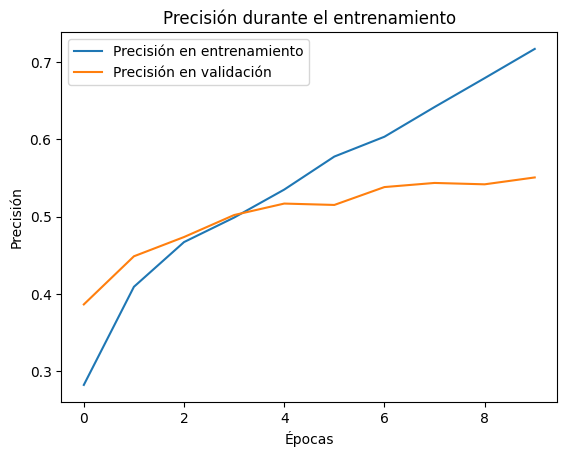

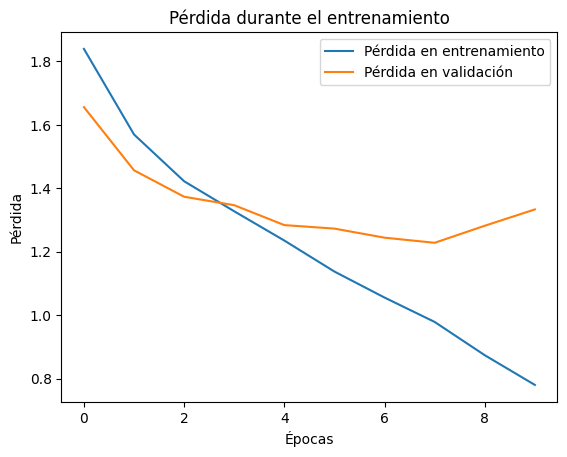

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicción: anger


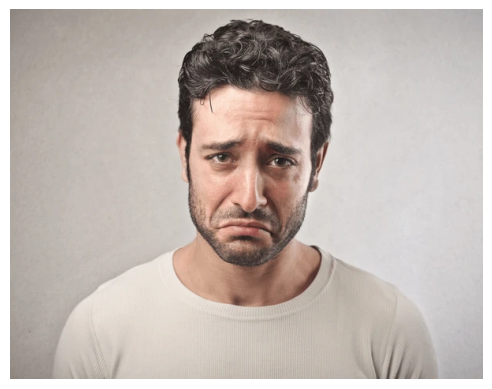

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar y preprocesar la imagen (convertir a escala de grises)
def load_and_preprocess_single_image(image_path, img_size=(48, 48)):
    # Cargar la imagen en color (RGB)
    img = cv2.imread(image_path)

    # Convertir la imagen a escala de grises
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises

    # Redimensionar la imagen
    img = cv2.resize(img, img_size)

    # Normalizar la imagen (valores entre 0 y 1)
    img = img / 255.0

    # Expande las dimensiones para que sea compatible con el modelo (Añadir dimensión para batch)
    img = np.expand_dims(img, axis=-1)  # Añadir la dimensión de canales (1 canal para escala de grises)
    img = np.expand_dims(img, axis=0)  # Añadir dimensión para el batch (1 imagen)

    return img

# Función para hacer la predicción
def predict_image(model, image_path):
    # Preprocesar la imagen
    img = load_and_preprocess_single_image(image_path)

    # Hacer la predicción
    prediction = model.predict(img)

    # Obtener la clase predicha (la de mayor probabilidad)
    predicted_class = np.argmax(prediction, axis=1)

    # Mapeo de las etiquetas a nombres de emociones
    emotion_labels = ['anger', 'contempt', 'neutral', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'yawning']

    # Mostrar la predicción
    predicted_emotion = emotion_labels[predicted_class[0]]

    print(f"Predicción: {predicted_emotion}")

    # Mostrar la imagen
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # Convertir a RGB para visualizar correctamente
    plt.imshow(img_show)
    plt.axis('off')
    plt.show()

# Ejemplo de uso: Test con una imagen
image_path = '/content/sad_test.webp'  # Cambia esta ruta a la imagen que quieres probar
predict_image(model, image_path)
